# Исследование надежности заемщиков.

### Шаг 1. Обзор данных

In [95]:
import pandas as pd
import numpy as np
data=pd.read_csv('data.csv')
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [96]:
data['days_employed']=np.where(data['days_employed']<0, np.nan, data['days_employed'] )
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,NaN,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,NaN,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,NaN,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,NaN,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [97]:
median_data=data['days_employed'].median()
data['days_employed']=data['days_employed'].fillna(median_data)

In [98]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,365213.306266,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,365213.306266,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,365213.306266,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,365213.306266,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [99]:
data.shape

(21525, 12)

In [100]:
data=data.drop_duplicates()

In [101]:
data.shape

(21471, 12)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21471 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21471 non-null  int64  
 1   days_employed     21471 non-null  float64
 2   dob_years         21471 non-null  int64  
 3   education         21471 non-null  object 
 4   education_id      21471 non-null  int64  
 5   family_status     21471 non-null  object 
 6   family_status_id  21471 non-null  int64  
 7   gender            21471 non-null  object 
 8   income_type       21471 non-null  object 
 9   debt              21471 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21471 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


### Шаг 2.1 Заполнение пропусков

In [103]:
print(data['education'].unique())

['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']


In [104]:
for column in ['education', 'income_type', 'purpose']:
    if column in data.columns:
        print(f"\nКолонка: {column}")
        print(f"Уникальные значения: {data[column].unique()}")
        print(f"Количество: {data[column].nunique()}")
    else:
        print(f"\nКолонка '{column}' не найдена в DataFrame")


Колонка: education
Уникальные значения: ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
Количество: 15

Колонка: income_type
Уникальные значения: ['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']
Количество: 8

Колонка: purpose
Уникальные значения: ['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей н

In [105]:
data['education']=data['education'].str.lower()
print(data['education'].unique())
        

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


### Шаг 2.2 Проверка данных на аномалии и исправления.

In [106]:
data['total_income'] = pd.to_numeric(data['total_income'], errors='coerce')

In [107]:
data['total_income'] = data['total_income'].fillna(0).astype(int)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21471 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21471 non-null  int64  
 1   days_employed     21471 non-null  float64
 2   dob_years         21471 non-null  int64  
 3   education         21471 non-null  object 
 4   education_id      21471 non-null  int64  
 5   family_status     21471 non-null  object 
 6   family_status_id  21471 non-null  int64  
 7   gender            21471 non-null  object 
 8   income_type       21471 non-null  object 
 9   debt              21471 non-null  int64  
 10  total_income      21471 non-null  int32  
 11  purpose           21471 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 1.6+ MB


### Шаг 2.3. Изменение типов данных.

### Шаг 2.4. Удаление дубликатов.

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [109]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,365213.306266,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,365213.306266,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,365213.306266,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,365213.306266,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


In [110]:
education_data=data[['education', 'education_id']]
education_data.head()

,education,education_id
0,высшее,0
1,среднее,1
2,среднее,1
3,среднее,1
4,среднее,1


In [111]:
family_status=data[['family_status', 'family_status_id']]
family_status.head()

,family_status,family_status_id
0,женат / замужем,0
1,женат / замужем,0
2,женат / замужем,0
3,женат / замужем,0
4,гражданский брак,1


In [112]:
data=data.drop(['family_status', 'education'], axis=1)
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,365213.306266,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,365213.306266,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,365213.306266,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,365213.306266,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Шаг 2.6. Категоризация дохода.

In [117]:
def categorize_total_income(i):
    if i <= 30000:
        return 'E'
    elif 30001 <= i <= 50000:
        return 'D'
    elif 50001 <= i <= 200000:
        return 'C'
    elif 200001 <= i <= 1000000:
        return 'B'
    else:  # i > 1000000
        return 'A'

data['categorize_total_income'] = data['total_income'].apply(categorize_total_income)

In [118]:
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,categorize_total_income
0,1,365213.306266,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,365213.306266,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,365213.306266,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,365213.306266,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Шаг 2.7. Категоризация целей кредита.

Создайте функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:
'операции с автомобилем',
'операции с недвижимостью',
'проведение свадьбы',
'получение образования'.
Например, если в столбце purpose находится подстрока 'на покупку автомобиля', то в столбце purpose_category должна появиться строка 'операции с автомобилем'.
Вы можете использовать собственную функцию и метод apply(). Изучите данные в столбце purpose и определите, какие подстроки помогут вам правильно определить категорию.

In [120]:
print(data['purpose'].unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


In [122]:
categories = {
    'операции с автомобилем': [
        'приобретение автомобиля',
        'на покупку подержанного автомобиля', 
        'на покупку своего автомобиля',
        'автомобили',
        'сделка с подержанным автомобилем',
        'автомобиль',
        'свой автомобиль', 
        'сделка с автомобилем',
        'на покупку автомобиля'
    ],
    
    'операции с недвижимостью': [
        'покупка жилья',
        'операции с жильем',
        'покупка жилья для семьи',
        'покупка недвижимости',
        'покупка коммерческой недвижимости',
        'покупка жилой недвижимости',
        'строительство собственной недвижимости', 
        'недвижимость',
        'строительство недвижимости',
        'операции с коммерческой недвижимостью',
        'строительство жилой недвижимости',
        'жилье',
        'операции со своей недвижимостью',
        'покупка своего жилья',
        'операции с недвижимостью',
        'покупка жилья для сдачи',
        'ремонт жилью'
    ],
    
    'проведение свадьбы': [
        'сыграть свадьбу',
        'на проведение свадьбы', 
        'свадьба'
    ],
    
    'получение образования': [
        'дополнительное образование',
        'образование',
        'заняться образованием',
        'получение образования',
        'получение дополнительного образования',
        'получение высшего образования', 
        'профильное образование',
        'высшее образование',
        'заняться высшим образованием'
    ]
}
auto_list = [
    'приобретение автомобиля',
    'на покупку подержанного автомобиля',
    'на покупку своего автомобиля',
    'автомобили',
    'сделка с подержанным автомобилем',
    'автомобиль',
    'свой автомобиль',
    'сделка с автомобилем',
    'на покупку автомобиля'
]
real_estate_list = [
    'покупка жилья',
    'операции с жильем',
    'покупка жилья для семьи',
    'покупка недвижимости',
    'покупка коммерческой недвижимости',
    'покупка жилой недвижимости',
    'строительство собственной недвижимости',
    'недвижимость',
    'строительство недвижимости',
    'операции с коммерческой недвижимостью',
    'строительство жилой недвижимости',
    'жилье',
    'операции со своей недвижимостью',
    'покупка своего жилья',
    'покупка жилья для сдачи',
    'ремонт жилью'
]
wedding_list = [
    'сыграть свадьбу',
    'на проведение свадьбы',
    'свадьба'
]
education_list = [
    'дополнительное образование',
    'образование',
    'заняться образованием',
    'получение образования',
    'получение дополнительного образования',
    'получение высшего образования',
    'профильное образование',
    'высшее образование',
    'заняться высшим образованием'
]

In [124]:
def categorize_purpose_category(purpose):
    if purpose in education_list:
        return 'получение образования'
    elif purpose in wedding_list:
        return 'проведение свадьбы'
    elif purpose in real_estate_list:
        return 'операции с недвижимостью'
    elif purpose in auto_list:
        return 'операции с автомобилем'

In [126]:
data['purpose_category']=data['purpose'].apply(categorize_purpose_category)
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,categorize_total_income,purpose_category
0,1,365213.306266,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,365213.306266,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,365213.306266,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,365213.306266,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


### Ответы на вопросы.

Шаг 3. Ответьте на вопросы
Ответы на вопросы можно разместить в ячейках тетрадок Jupyter Notebook с типом markdown.
Есть ли зависимость между количеством детей и возвратом кредита в срок?
Есть ли зависимость между семейным положением и возвратом кредита в срок?
Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
Как разные цели кредита влияют на его возврат в срок?
Ответы сопроводите интерпретацией — поясните, о чём именно говорит полученный вами результат.

In [128]:
##### Вопрос 1:
# 1. Зависимость между количеством детей и возвратом кредита
children_debt = data.groupby('children')['debt'].mean()
print("Доля невозвратов по количеству детей:")
print(children_debt)

# 2. Зависимость между семейным положением и возвратом кредита
family_debt = data.groupby('family_status_id')['debt'].mean()
print("\nДоля невозвратов по семейному положению:")
print(family_debt)

# 3. Зависимость между уровнем дохода и возвратом кредита
income_debt = data.groupby('categorize_total_income')['debt'].mean()
print("\nДоля невозвратов по уровню дохода:")
print(income_debt)

# 4. Влияние цели кредита на возврат
purpose_debt = data.groupby('purpose_category')['debt'].mean()
print("\nДоля невозвратов по цели кредита:")
print(purpose_debt)

Доля невозвратов по количеству детей:
children
-1     0.021277
 0     0.075353
 1     0.092327
 2     0.094542
 3     0.081818
 4     0.097561
 5     0.000000
 20    0.105263
Name: debt, dtype: float64

Доля невозвратов по семейному положению:
family_status_id
0    0.075421
1    0.093202
2    0.065693
3    0.071130
4    0.097509
Name: debt, dtype: float64

Доля невозвратов по уровню дохода:
categorize_total_income
A    0.080000
B    0.070621
C    0.085532
D    0.060000
E    0.080299
Name: debt, dtype: float64

Доля невозвратов по цели кредита:
purpose_category
операции с автомобилем      0.093547
операции с недвижимостью    0.071703
получение образования       0.092177
проведение свадьбы          0.079657
Name: debt, dtype: float64


In [129]:
print("Дети:", data.groupby('children')['debt'].mean())
print("Семейное положение:", data.groupby('family_status_id')['debt'].mean())
print("Доход:", data.groupby('categorize_total_income')['debt'].mean())
print("Цель кредита:", data.groupby('purpose_category')['debt'].mean())

Дети: children
-1     0.021277
 0     0.075353
 1     0.092327
 2     0.094542
 3     0.081818
 4     0.097561
 5     0.000000
 20    0.105263
Name: debt, dtype: float64
Семейное положение: family_status_id
0    0.075421
1    0.093202
2    0.065693
3    0.071130
4    0.097509
Name: debt, dtype: float64
Доход: categorize_total_income
A    0.080000
B    0.070621
C    0.085532
D    0.060000
E    0.080299
Name: debt, dtype: float64
Цель кредита: purpose_category
операции с автомобилем      0.093547
операции с недвижимостью    0.071703
получение образования       0.092177
проведение свадьбы          0.079657
Name: debt, dtype: float64


## Общий вывод:

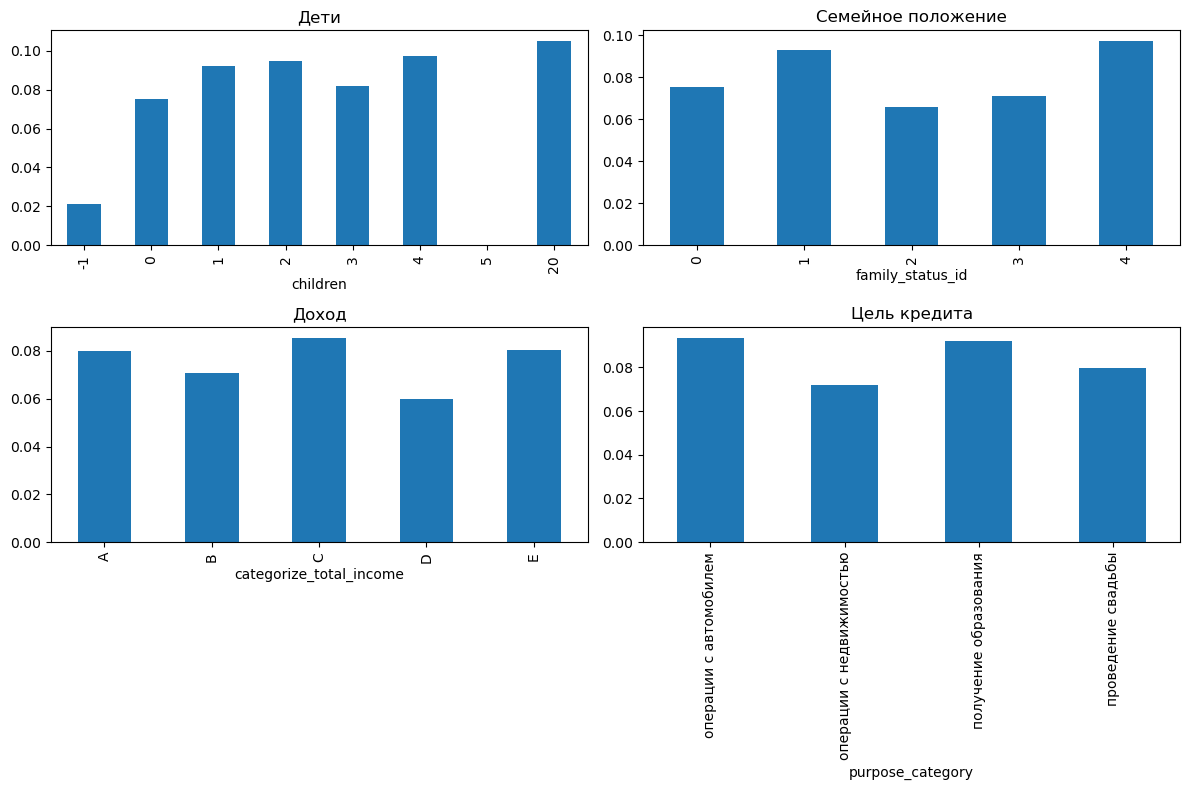

In [130]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

data.groupby('children')['debt'].mean().plot(kind='bar', ax=axes[0,0], title='Дети')
data.groupby('family_status_id')['debt'].mean().plot(kind='bar', ax=axes[0,1], title='Семейное положение')
data.groupby('categorize_total_income')['debt'].mean().plot(kind='bar', ax=axes[1,0], title='Доход')
data.groupby('purpose_category')['debt'].mean().plot(kind='bar', ax=axes[1,1], title='Цель кредита')

plt.tight_layout()
plt.show()